In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
file_path = '/content/drive/MyDrive/ML/insurance.csv'
df = pd.read_csv(file_path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
#pair each with charges
print(df.dtypes)
print(df.isna().sum())
print(df['smoker'].value_counts())
#df['age'].value_counts().sort_index()

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64


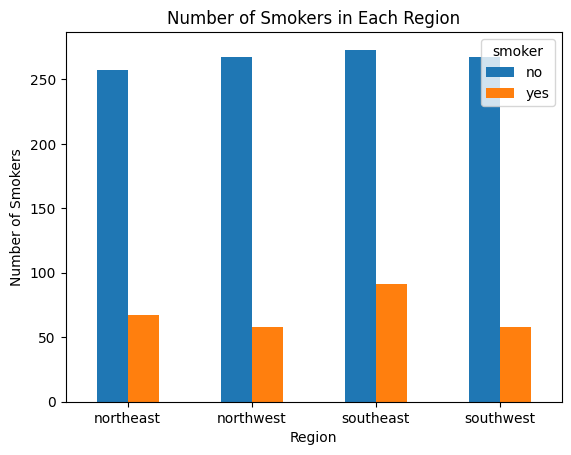

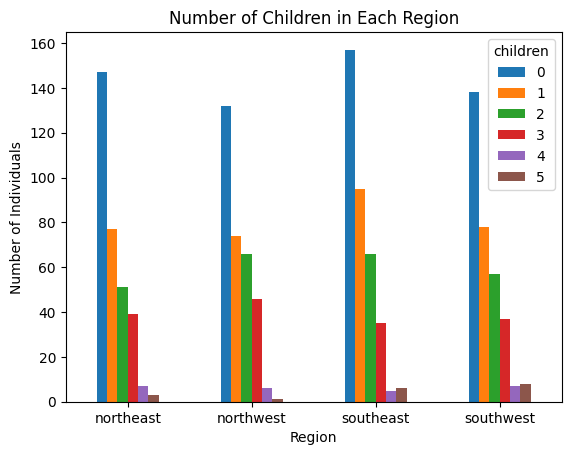

In [47]:
# Amount of smokers in each region
smoker_region_counts = df.groupby('region')['smoker'].value_counts().unstack().fillna(0)

smoker_region_counts.plot(kind='bar', stacked=False)
plt.xlabel("Region")
plt.ylabel("Number of Smokers")
plt.title("Number of Smokers in Each Region")
plt.xticks(rotation=0)
plt.show()

# Number of children in each region
children_region_counts = df.groupby('region')['children'].value_counts().unstack().fillna(0)

children_region_counts.plot(kind='bar', stacked=False)
plt.xlabel("Region")
plt.ylabel("Number of Individuals")
plt.title("Number of Children in Each Region")
plt.xticks(rotation=0)
plt.show()

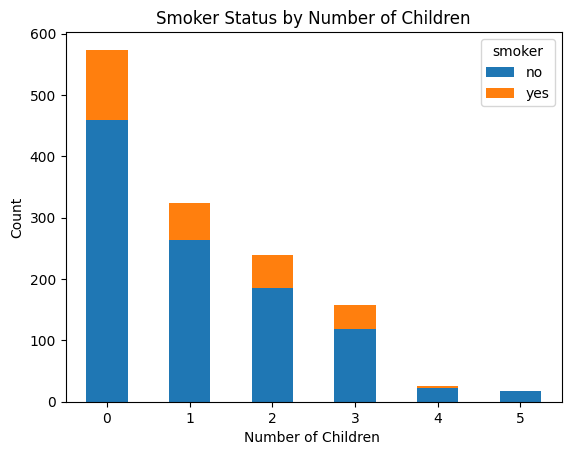

In [44]:
#have children vs smoker or not
children_smoker = df.groupby('children')['smoker'].value_counts().unstack().fillna(0)
children_smoker.plot(kind='bar', stacked=True)
plt.xlabel("Number of Children ")
plt.ylabel("Count")
plt.title("Smoker Status by Number of Children")
plt.xticks(rotation=0)
plt.show()

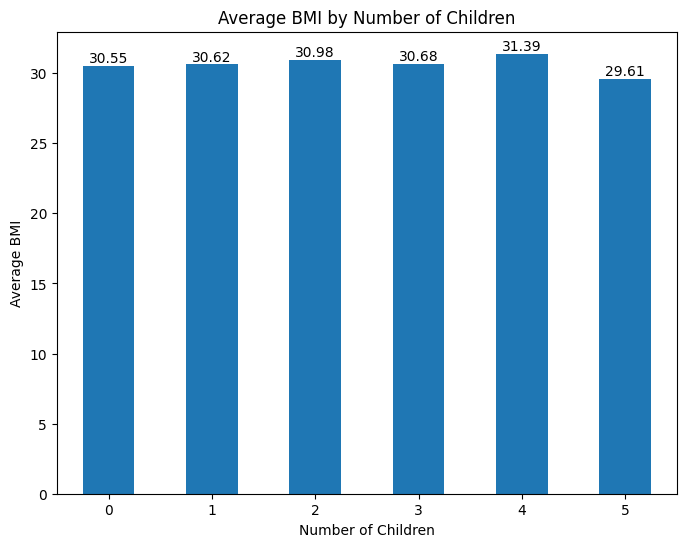

In [49]:
# Calculate the mean BMI for each number of children
mean_bmi_by_children = df.groupby('children')['bmi'].mean()

# Create a bar chart
plt.figure(figsize=(8, 6))
ax = mean_bmi_by_children.plot(kind='bar', rot=0)
plt.xlabel("Number of Children")
plt.ylabel("Average BMI")
plt.title("Average BMI by Number of Children")

# Add the exact mean on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

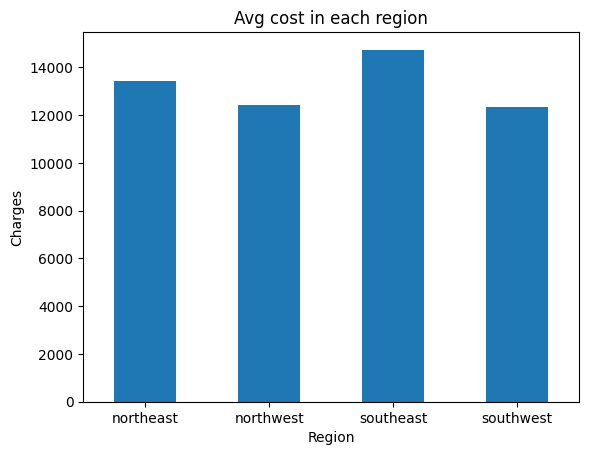

In [31]:
#region vs charges
rc = df.groupby("region")["charges"].mean()

rc.plot(kind = "bar", rot = 0)
plt.xlabel("Region")
plt.ylabel("Charges")
plt.title("Avg cost in each region")
plt.show()

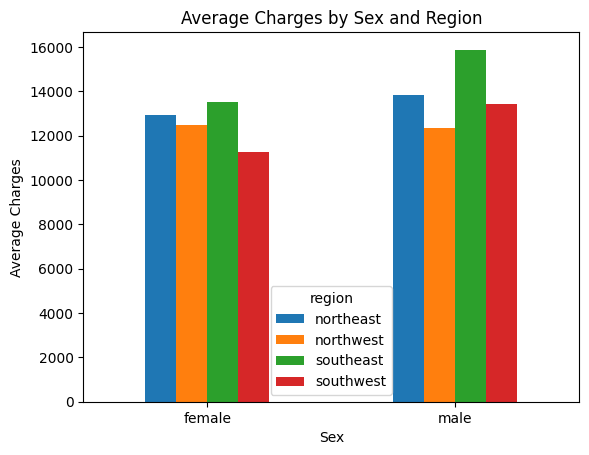

In [33]:
sex_region_charges = df.groupby(['sex', 'region'])['charges'].mean().unstack()
sex_region_charges.plot(kind='bar')
plt.xlabel("Sex")
plt.ylabel("Average Charges")
plt.title("Average Charges by Sex and Region")
plt.xticks(rotation=0)
plt.show()

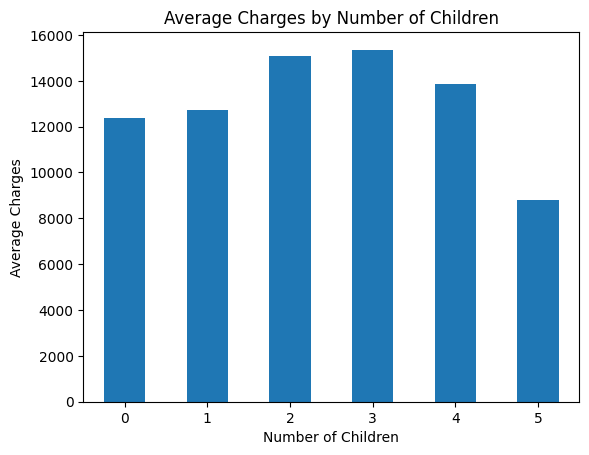

In [43]:
children_charges = df.groupby("children")["charges"].mean()

children_charges.plot(kind = "bar", rot = 0)
plt.xlabel("Number of Children")
plt.ylabel("Average Charges")
plt.title("Average Charges by Number of Children")
plt.show()

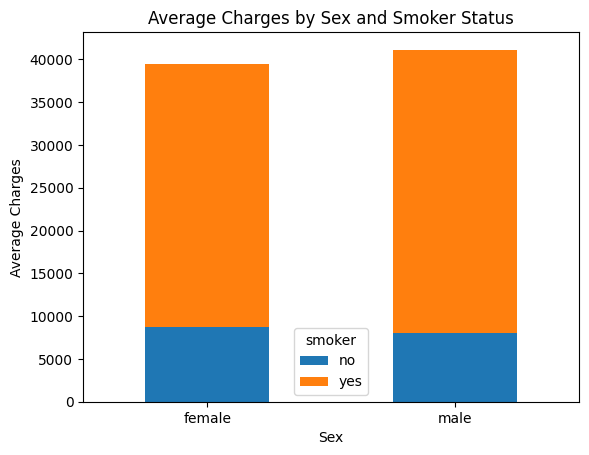

In [32]:
sex_smoker_charges = df.groupby(['sex', 'smoker'])['charges'].mean().unstack()
sex_smoker_charges.plot(kind='bar', stacked=True)
plt.xlabel("Sex")
plt.ylabel("Average Charges")
plt.title("Average Charges by Sex and Smoker Status")
plt.xticks(rotation=0)
plt.show()

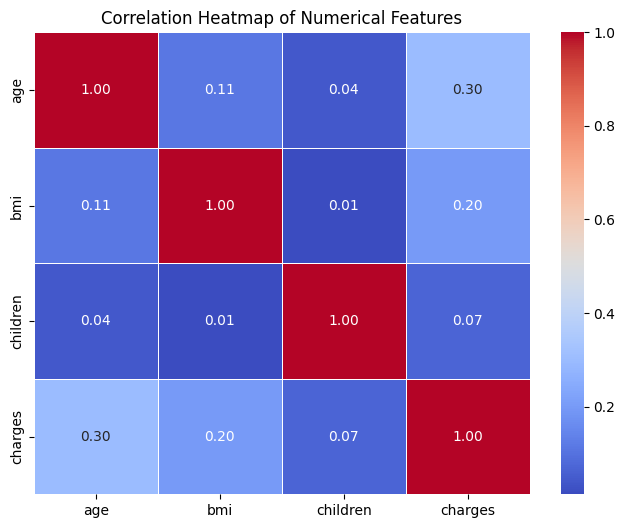

In [34]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

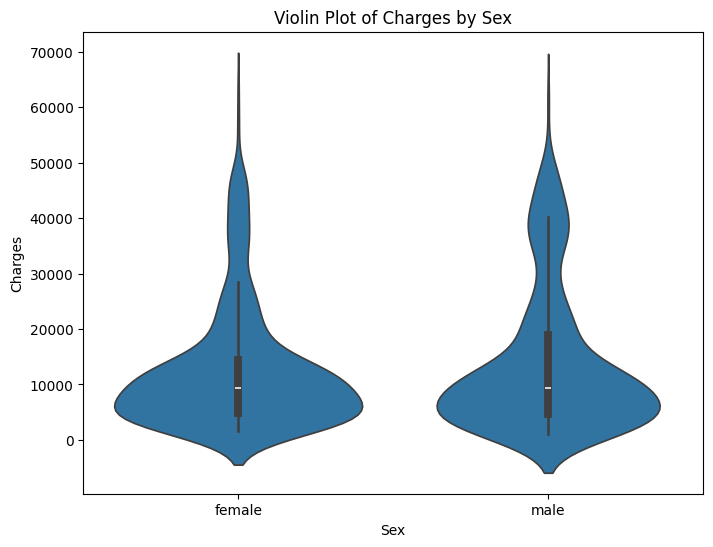

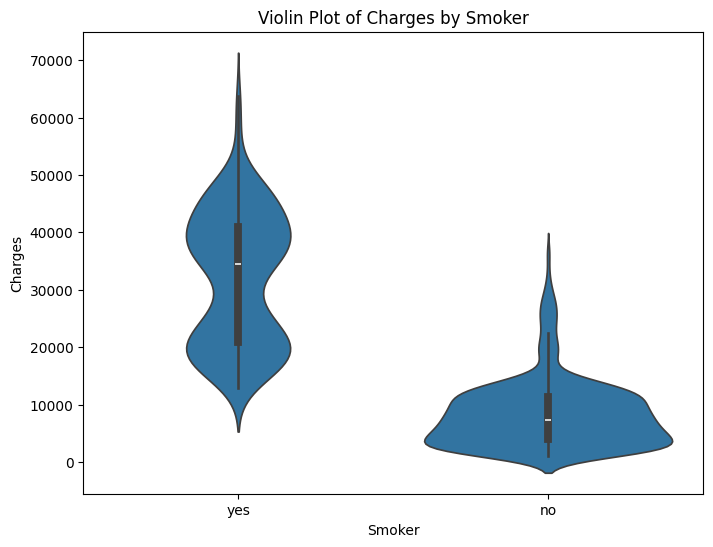

In [35]:
# charges by sex
plt.figure(figsize=(8, 6))
sns.violinplot(x='sex', y='charges', data=df)
plt.xlabel("Sex")
plt.ylabel("Charges")
plt.title("Violin Plot of Charges by Sex")
plt.show()
# smoker or nah
plt.figure(figsize=(8, 6))
sns.violinplot(x='smoker', y='charges', data=df)
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.title("Violin Plot of Charges by Smoker")
plt.show()


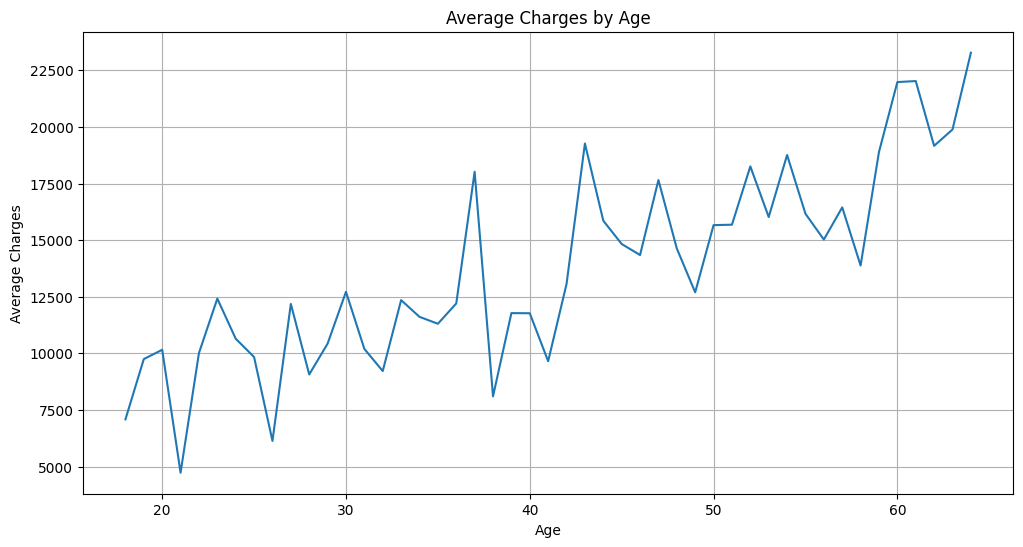

In [36]:
mean_charges_by_age = df.groupby('age')['charges'].mean()
plt.figure(figsize=(12, 6))
mean_charges_by_age.plot(kind='line')
plt.xlabel("Age")
plt.ylabel("Average Charges")
plt.title("Average Charges by Age")
plt.grid(True)
plt.show()
#missing data for under 18s

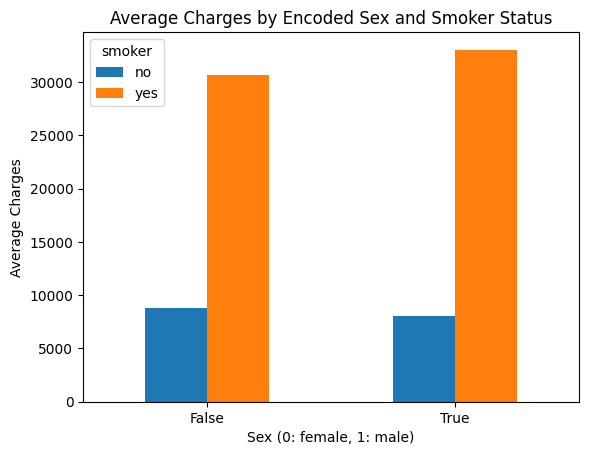

In [37]:
df_encoded = pd.get_dummies(df, columns=['sex'], drop_first=True)
sex_smoker_encoded_charges = df_encoded.groupby(['sex_male', 'smoker'])['charges'].mean().unstack()
sex_smoker_encoded_charges.plot(kind='bar')
plt.xlabel("Sex (0: female, 1: male)")
plt.ylabel("Average Charges")
plt.title("Average Charges by Encoded Sex and Smoker Status")
plt.xticks(rotation=0)
plt.show()

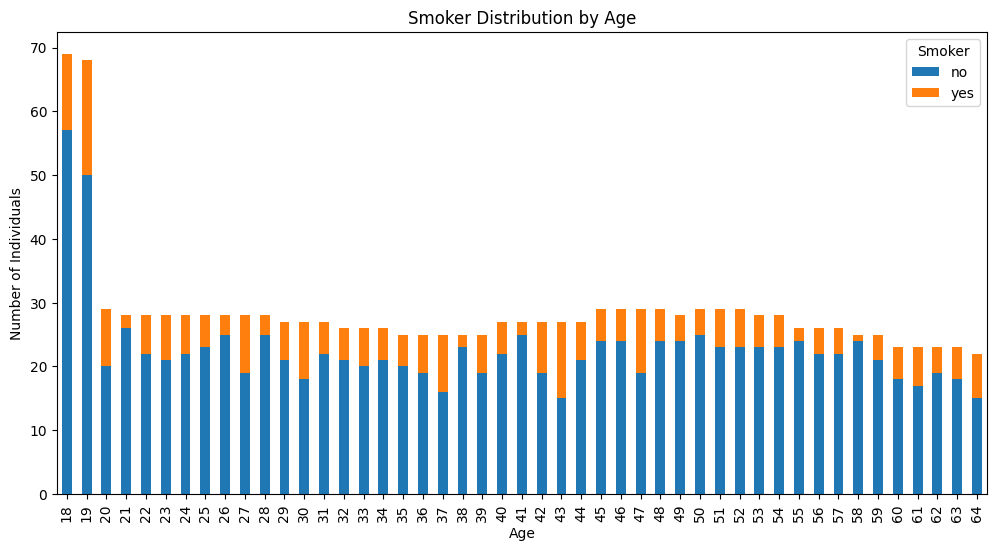

In [38]:
smoker_by_age = df.groupby('age')['smoker'].value_counts().unstack().fillna(0)
smoker_by_age.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel("Age")
plt.ylabel("Number of Individuals")
plt.title("Smoker Distribution by Age")
plt.legend(title='Smoker')
plt.show()

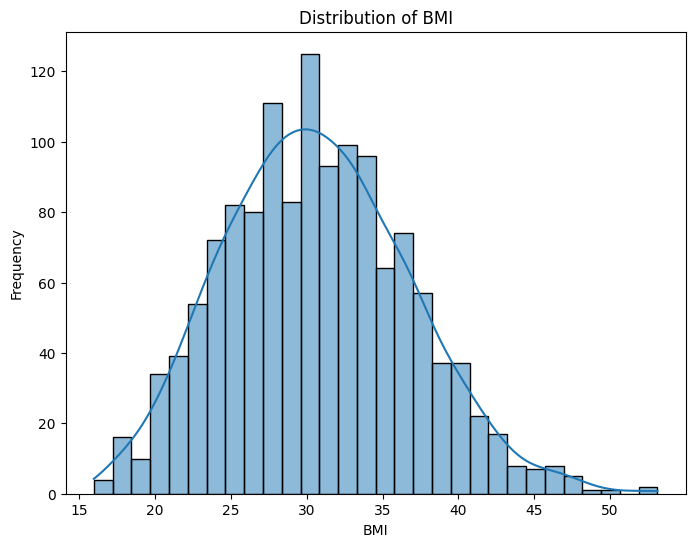

In [39]:
plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'], kde=True, bins=30)
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("Distribution of BMI")
plt.show()

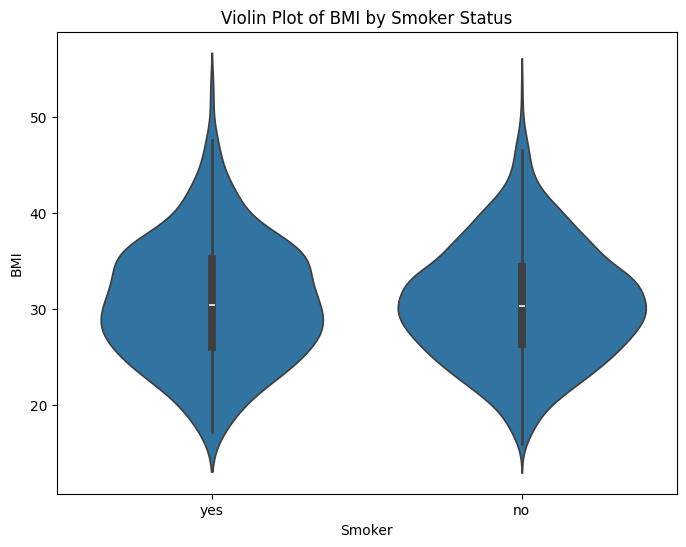

In [40]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='smoker', y='bmi', data=df)
plt.xlabel("Smoker")
plt.ylabel("BMI")
plt.title("Violin Plot of BMI by Smoker Status")
plt.show()

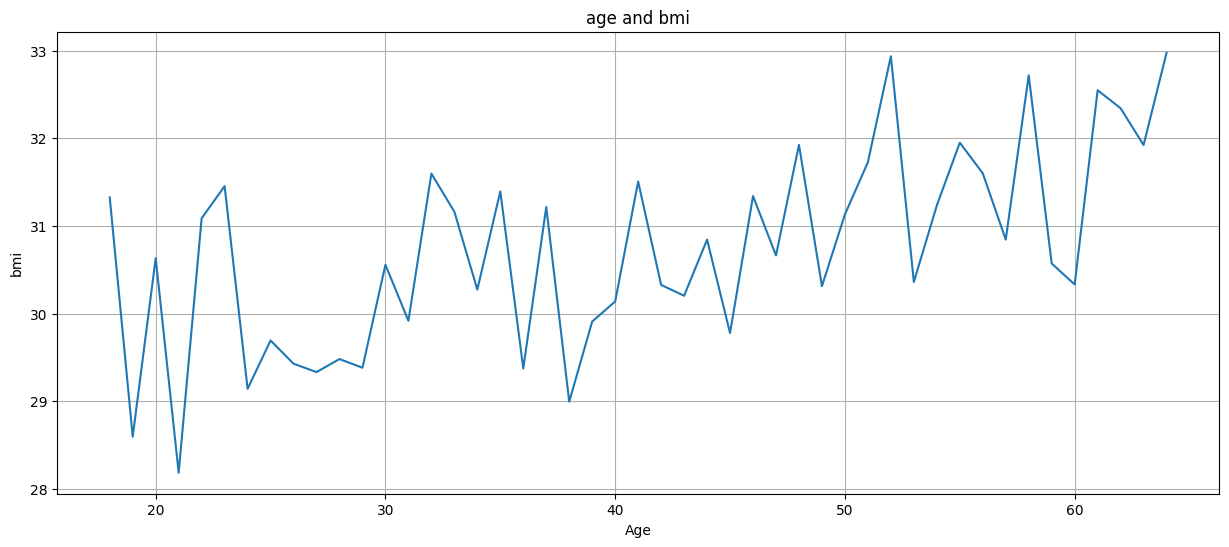

In [41]:
mean_charges_by_age = df.groupby('age')['bmi'].mean()
plt.figure(figsize=(15, 6))
mean_charges_by_age.plot(kind='line')
plt.xlabel("Age")
plt.ylabel("bmi")
plt.title("age and bmi")
plt.grid(True)
plt.show()
#missing data for under 18s

In [42]:
df['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [45]:
#bmi vs